In [15]:
import  pandas  as  pd
import  numpy as  np                   
import seaborn as sns                  
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('E:/bank-full.csv',sep=';')

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
y = data['y']

In [23]:
data.y.replace('yes', 1,inplace=True)

In [24]:
data.y.replace('no', 0,inplace=True)

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


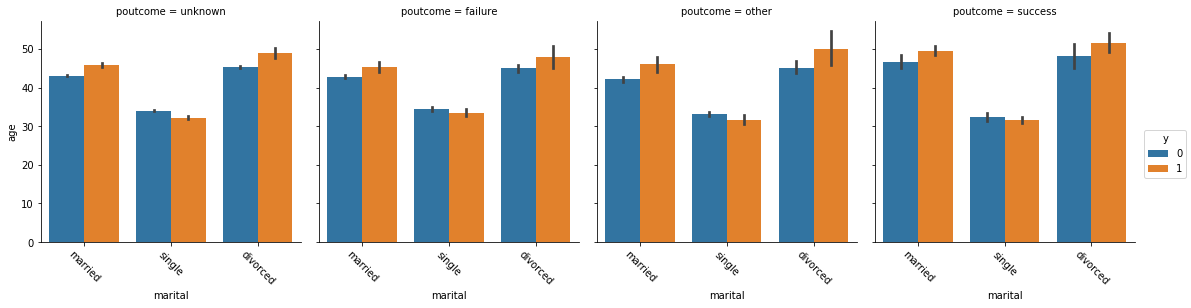

In [30]:
k = sns.factorplot(x='marital', y='age', data=data , hue='y', col='poutcome', kind = 'bar')  

k.set_xticklabels(rotation=-45)

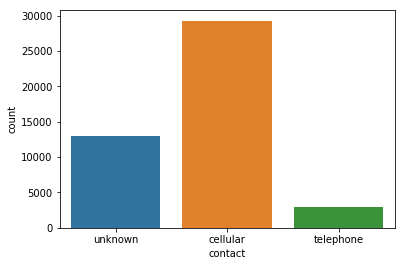

In [32]:
sns.countplot(x='contact', data=data)

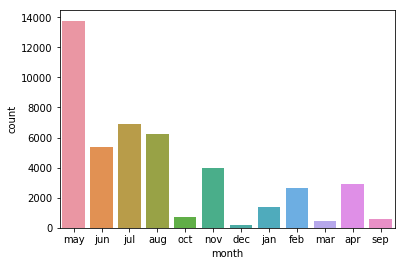

In [33]:
sns.countplot(x='month', data=data)

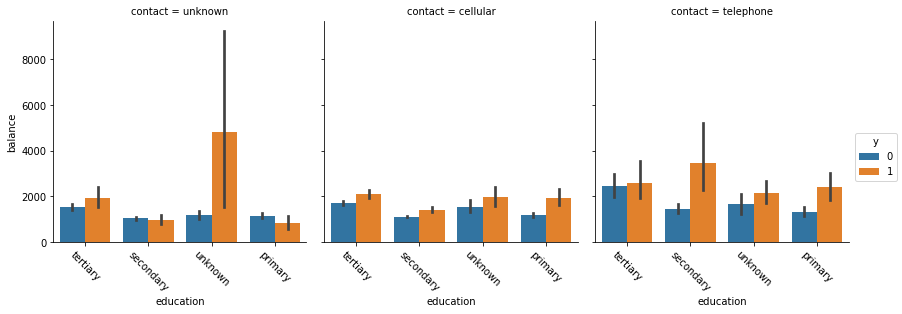

In [34]:
k = sns.factorplot(x='education', y='balance', data=data, hue='y', col='contact', kind = 'bar') 

k.set_xticklabels(rotation=-45)
                  

In [35]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [36]:
data = encode_features(data)

In [37]:
X = data.drop(['y'], axis = 1)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [58]:
algo = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5)

In [59]:
algo.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
y_pred = algo.predict(X_test)

In [61]:
z = confusion_matrix(y_pred,y_test)

In [62]:
z

array([[7809,  827],
       [ 173,  234]], dtype=int64)

In [63]:
accuracy_score(y_pred,y_test)

0.8894172287957536